In [1]:
from astropy.modeling import models, fitting
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
#from dendrocat.aperture import Ellipse
from matplotlib.patches import Rectangle, Ellipse
import regions
from scipy.optimize import curve_fit
from regions import EllipseAnnulusSkyRegion, EllipseAnnulusPixelRegion
import Paths.Paths as paths

Path = paths.filepaths()


/home/t.yoo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### deconvolved FWHM histogram, S/N is estimated based on size uncertainties

ho 20 63 16 22
95 99 82 35
0 0.0 0.0 8.230597280558473e-06 3.882385880810623e-06
1 0.0 0.0 0.0 0.0
2 2.8117756084565645e-05 1.5046944165274004e-05 1.4936623040854157e-05 5.956786890601184e-06
3 0.0 0.0 0.0 0.0
4 0.0 0.0 1.110922533586952e-05 5.07407302874516e-06
5 0.0 0.0 0.0 0.0
6 0.0 0.0 0.0 0.0
7 0.0 0.0 0.0 0.0
8 0.0 0.0 1.2489894812807753e-05 1.030178416706992e-05
9 0.0 0.0 1.4207523279194821e-05 8.14004979119674e-06
10 0.0 0.0 1.5152208884167494e-05 7.444503681986172e-06
11 0.0 0.0 9.505534167431092e-06 7.341057313244214e-06
12 0.0 0.0 1.0392092334675658e-05 4.835620940207962e-06
13 0.0 0.0 1.2423999979798727e-05 6.146811366145173e-06
14 0.0 0.0 9.409227243802669e-06 5.370297999700458e-06
15 0.0 0.0 0.0 0.0
16 0.0 0.0 1.5343245351558777e-05 3.4556022410758382e-06
17 0.0 0.0 0.0 0.0
18 0.0 0.0 1.0232943044279485e-05 4.3857475503083735e-06
19 0.0 0.0 1.0587537092701933e-05 6.537480017030368e-06
20 0.0 0.0 1.5362763499130387e-05 1.3906845251496596e-05
21 2.014672857954421e-05 6.5216

22.794662753132005
11.41387023617021
22.794662753132005
11.41387023617021


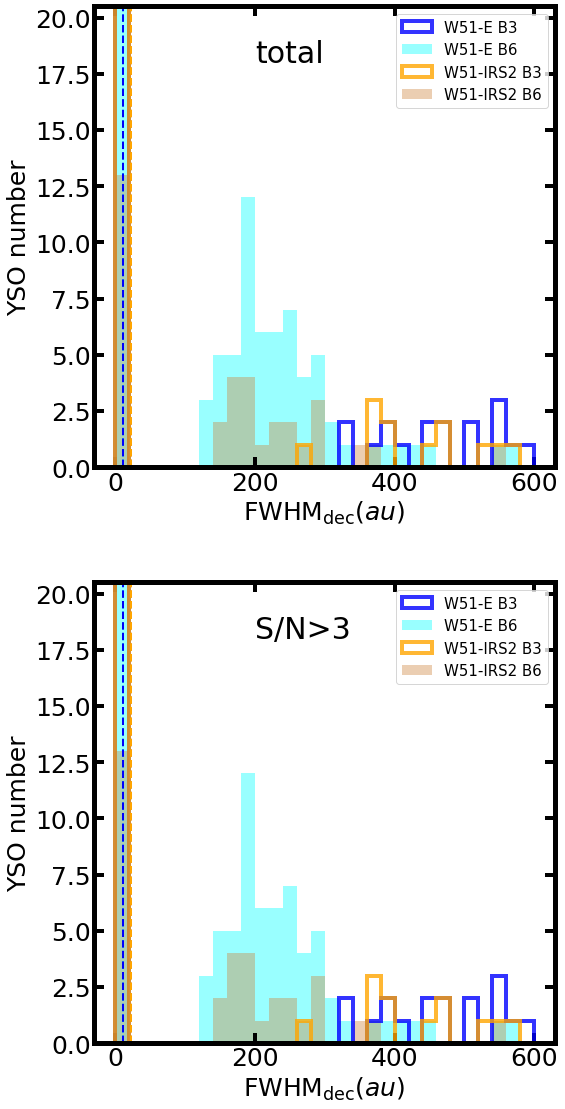

In [2]:
from astropy.table import Table
import matplotlib as mpl
import astropy.units as u
import astropy.constants as c
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
fig = plt.figure(figsize=(8,16))
ax1 = fig.add_axes([0.15,0.58,0.8,0.4])
ax2 = fig.add_axes([0.15,0.08,0.8,0.4])
w51e_b3_flux_fits = Table.read(Path.w51e_b3_flux)
w51e_b6_flux_fits = Table.read(Path.w51e_b6_flux)
w51n_b3_flux_fits = Table.read(Path.w51n_b3_flux)
w51n_b6_flux_fits = Table.read(Path.w51n_b6_flux)
w51e_b6_flux_conv_fits = Table.read(Path.w51e_b6_conv_flux)
w51n_b6_flux_conv_fits = Table.read(Path.w51n_b6_conv_flux)

w51e_b3_flux = w51e_b3_flux_fits['flux']
w51e_b6_flux = w51e_b6_flux_fits['flux']
w51n_b3_flux = w51n_b3_flux_fits['flux']
w51n_b6_flux = w51n_b6_flux_fits['flux']

w51e_catalog = Table.read(Path.w51e_dendro_matched_catalog_new)
w51n_catalog = Table.read(Path.w51n_dendro_matched_catalog_new)

w51e_b3_detected = w51e_catalog['b3_xpix']>0
w51e_b6_detected = w51e_catalog['b6_xpix']>0
w51n_b3_detected = w51n_catalog['b3_xpix']>0
w51n_b6_detected = w51n_catalog['b6_xpix']>0



w51e_b3_major = w51e_b3_flux_fits['deconvolved_major'][w51e_b3_detected]
w51e_b6_major = w51e_b6_flux_fits['deconvolved_major'][w51e_b6_detected]
w51n_b3_major = w51n_b3_flux_fits['deconvolved_major'][w51n_b3_detected]
w51n_b6_major = w51n_b6_flux_fits['deconvolved_major'][w51n_b6_detected]
w51e_b3_minor = w51e_b3_flux_fits['deconvolved_minor'][w51e_b3_detected]
w51e_b6_minor = w51e_b6_flux_fits['deconvolved_minor'][w51e_b6_detected]
w51n_b3_minor = w51n_b3_flux_fits['deconvolved_minor'][w51n_b3_detected]
w51n_b6_minor = w51n_b6_flux_fits['deconvolved_minor'][w51n_b6_detected]

print('ho',len(np.where(w51e_b3_major>0)[0]), len(np.where(w51e_b6_major>0)[0]), len(np.where(w51n_b3_major>0)[0]), len(np.where(w51n_b6_major>0)[0]))
"""
w51e_b3_major_upperr = w51e_b3_flux_fits['deconvolved_major_upperr']
w51e_b6_major_upperr = w51e_b6_flux_fits['deconvolved_major_upperr']
w51n_b3_major_upperr = w51n_b3_flux_fits['deconvolved_major_upperr']
w51n_b6_major_upperr = w51n_b6_flux_fits['deconvolved_major_upperr']
w51e_b3_minor_upperr = w51e_b3_flux_fits['deconvolved_minor_upperr']
w51e_b6_minor_upperr = w51e_b6_flux_fits['deconvolved_minor_upperr']
w51n_b3_minor_upperr = w51n_b3_flux_fits['deconvolved_minor_upperr']
w51n_b6_minor_upperr = w51n_b6_flux_fits['deconvolved_minor_upperr']

w51e_b3_major_lowerr = w51e_b3_flux_fits['deconvolved_major_lowerr']
w51e_b6_major_lowerr = w51e_b6_flux_fits['deconvolved_major_lowerr']
w51n_b3_major_lowerr = w51n_b3_flux_fits['deconvolved_major_lowerr']
w51n_b6_major_lowerr = w51n_b6_flux_fits['deconvolved_major_lowerr']
w51e_b3_minor_lowerr = w51e_b3_flux_fits['deconvolved_minor_lowerr']
w51e_b6_minor_lowerr = w51e_b6_flux_fits['deconvolved_minor_lowerr']
w51n_b3_minor_lowerr = w51n_b3_flux_fits['deconvolved_minor_lowerr']
w51n_b6_minor_lowerr = w51n_b6_flux_fits['deconvolved_minor_lowerr']
"""
w51e_catalog = Table.read(Path.w51e_dendro_matched_catalog_new) 
w51n_catalog = Table.read(Path.w51n_dendro_matched_catalog_new) 

isoverlap_w51e = w51e_catalog['is_overlap']
isoverlap_w51n = w51n_catalog['is_overlap']

print(len(w51e_b3_major), len(w51e_b6_major), len(w51n_b3_major), len(w51n_b6_major))

# isoverlap should be an index of band 6 size array because the b6 size of source outside
# of B6 FOV is assigned to be 0 but they don't have zero physical size.
for i in range(len(w51e_b3_major)):
    print(i, w51e_b3_major[i], w51e_b3_minor[i],w51e_b6_major[i], w51e_b6_minor[i])
"""
w51e_b3_avg_size = np.sqrt(w51e_b3_major * w51e_b3_minor) 
w51e_b6_avg_size = np.sqrt(w51e_b6_major[isoverlap_w51e] * w51e_b6_minor[isoverlap_w51e])
w51n_b3_avg_size = np.sqrt(w51n_b3_major * w51n_b3_minor) 
w51n_b6_avg_size = np.sqrt(w51n_b6_major[isoverlap_w51n] * w51n_b6_minor[isoverlap_w51n]) 

w51e_b3_avg_size = w51e_b3_major * 2 / 2.355 
w51e_b6_avg_size = w51e_b6_major[isoverlap_w51e] * 2 / 2.355 
w51n_b3_avg_size = w51n_b3_major * 2 / 2.355 
w51n_b6_avg_size = w51n_b6_major[isoverlap_w51n] * 2 / 2.355 
"""
def get_max_size(size_major, size_minor):
    sizearr = []
    idxarr = []
    for i in range(len(size_major)):
        if size_major[i]>size_minor[i]:
            sizearr.append(size_major[i])
        else:
            sizearr.append(size_minor[i])
            idxarr.append(i)
    return np.array(sizearr), np.array(idxarr)

#w51e_b3_max_size,w51e_b3_idx = get_max_size(w51e_b3_major, w51e_b3_minor)
#w51e_b6_max_size,w51e_b6_idx = get_max_size(w51e_b6_major[isoverlap_w51e], w51e_b6_major[isoverlap_w51e]) 
#w51n_b3_max_size,w51n_b3_idx = get_max_size(w51n_b3_major, w51n_b3_minor)
#w51n_b6_max_size,w51n_b6_idx = get_max_size(w51n_b6_major[isoverlap_w51n], w51n_b6_minor[isoverlap_w51n])

w51e_b3_max_size_au = w51e_b3_major * np.pi/180 * 5.4*1000*206265
w51e_b6_max_size_au = w51e_b6_major * np.pi/180 * 5.4*1000*206265
w51n_b3_max_size_au = w51n_b3_major * np.pi/180 * 5.4*1000*206265
w51n_b6_max_size_au = w51n_b6_major * np.pi/180 * 5.4*1000*206265
"""
w51e_b3_max_size_upp = np.array([w51e_b3_minor_upperr[i] if i in w51e_b3_idx else w51e_b3_major_upperr[i] for i in range(len(w51e_b3_max_size))])
w51e_b6_max_size_upp = np.array([w51e_b6_minor_upperr[i] if i in w51e_b6_idx else w51e_b6_major_upperr[i] for i in range(len(w51e_b6_max_size))]) 
w51n_b3_max_size_upp = np.array([w51n_b3_minor_upperr[i] if i in w51n_b3_idx else w51n_b3_major_upperr[i] for i in range(len(w51n_b3_max_size))]) 
w51n_b6_max_size_upp = np.array([w51n_b6_minor_upperr[i] if i in w51n_b6_idx else w51n_b6_major_upperr[i] for i in range(len(w51n_b6_max_size))]) 

w51e_b3_max_size_low = np.array([w51e_b3_minor_lowerr[i] if i in w51e_b3_idx else w51e_b3_major_lowerr[i] for i in range(len(w51e_b3_max_size))]) 
w51e_b6_max_size_low = np.array([w51e_b6_minor_lowerr[i] if i in w51e_b6_idx else w51e_b6_major_lowerr[i] for i in range(len(w51e_b6_max_size))]) 
w51n_b3_max_size_low = np.array([w51n_b3_minor_lowerr[i] if i in w51n_b3_idx else w51n_b3_major_lowerr[i] for i in range(len(w51n_b3_max_size))]) 
w51n_b6_max_size_low = np.array([w51n_b6_minor_lowerr[i] if i in w51n_b6_idx else w51n_b6_major_lowerr[i] for i in range(len(w51n_b6_max_size))]) 
"""

"""
w51e_b3_avg_size_upp = np.sqrt(w51e_b3_major_upperr * w51e_b3_minor_upperr)
w51e_b6_avg_size_upp = np.sqrt(w51e_b6_major_upperr * w51e_b6_minor_upperr)[isoverlap_w51e]
w51n_b3_avg_size_upp = np.sqrt(w51n_b3_major_upperr * w51n_b3_minor_upperr)
w51n_b6_avg_size_upp = np.sqrt(w51n_b6_major_upperr * w51n_b6_minor_upperr)[isoverlap_w51n]

w51e_b3_avg_size_low = np.sqrt(w51e_b3_major_lowerr * w51e_b3_minor_lowerr)
w51e_b6_avg_size_low = np.sqrt(w51e_b6_major_lowerr * w51e_b6_minor_lowerr)[isoverlap_w51e]
w51n_b3_avg_size_low = np.sqrt(w51n_b3_major_lowerr * w51n_b3_minor_lowerr)
w51n_b6_avg_size_low = np.sqrt(w51n_b6_major_lowerr * w51n_b6_minor_lowerr)[isoverlap_w51n]  
"""

#w51e_b3_size_err = w51e_b3_max_size_upp - w51e_b3_max_size_low
#w51e_b6_size_err = w51e_b6_max_size_upp - w51e_b6_max_size_low
#w51n_b3_size_err = w51n_b3_max_size_upp - w51n_b3_max_size_low
#w51n_b6_size_err = w51n_b6_max_size_upp - w51n_b6_max_size_low

"""
w51e_b3_snr = w51e_b3_max_size/w51e_b3_size_err
w51e_b6_snr = w51e_b6_max_size/w51e_b6_size_err
w51n_b3_snr = w51n_b3_max_size/w51n_b3_size_err
w51n_b6_snr = w51n_b6_max_size/w51n_b6_size_err

w51e_b3_snrind = np.where(w51e_b3_snr>3)[0]
w51e_b6_snrind = np.where(w51e_b6_snr>3)[0]
w51n_b3_snrind = np.where(w51n_b3_snr>3)[0]
w51n_b6_snrind = np.where(w51n_b6_snr>3)[0]
"""

bins = np.linspace(0,600,31)
print(len(w51e_b3_max_size_au), len(w51e_b6_max_size_au), len(w51n_b3_max_size_au), len(w51n_b6_max_size_au))
print(len(np.where(w51e_b3_max_size_au>0)[0]), len(np.where(w51e_b6_max_size_au>0)[0]), len(np.where(w51n_b3_max_size_au>0)[0]), len(np.where(w51n_b6_max_size_au>0)[0]))
ax1.hist(w51e_b3_max_size_au, bins=bins, facecolor='none',edgecolor='b', histtype='step',label='W51-E B3',lw=4,alpha=0.8)
ax1.hist(w51e_b6_max_size_au, bins=bins, color='cyan',label='W51-E B6',lw=4,alpha=0.4)
ax1.hist(w51n_b3_max_size_au, bins=bins, facecolor='none',edgecolor='orange', histtype='step',label='W51-IRS2 B3',lw=4,alpha=0.8)
ax1.hist(w51n_b6_max_size_au, bins=bins, color='peru',label='W51-IRS2 B6',lw=4,alpha=0.4)
print('median',np.median(w51e_b3_max_size_au),np.median(w51e_b6_max_size_au),np.median(w51n_b3_max_size_au),np.median(w51n_b6_max_size_au))
ax1.set_xlabel(r'${\rm FWHM}_{\rm dec} (au)$')
ax1.set_ylabel('YSO number')
ax1.legend(fontsize=15)

ax2.hist(w51e_b3_max_size_au, bins=bins, facecolor='none',edgecolor='b', histtype='step',label='W51-E B3',lw=4,alpha=0.8)
ax2.hist(w51e_b6_max_size_au, bins=bins, color='cyan',label='W51-E B6',lw=4,alpha=0.4)
ax2.hist(w51n_b3_max_size_au, bins=bins, facecolor='none',edgecolor='orange', histtype='step',label='W51-IRS2 B3',lw=4,alpha=0.8)
ax2.hist(w51n_b6_max_size_au, bins=bins, color='peru',label='W51-IRS2 B6',lw=4,alpha=0.4)

w51e_b6_hdr = fits.getheader(Path.w51e_b6_tt0)
w51n_b6_hdr = fits.getheader(Path.w51n_b6_tt0)
w51e_b3_hdr = fits.getheader(Path.w51e_b3_tt0)
w51n_b3_hdr = fits.getheader(Path.w51n_b3_tt0)

beam_w51e_b6 = Beam.from_fits_header(w51e_b6_hdr)    
beam_w51n_b6 = Beam.from_fits_header(w51n_b6_hdr)    
beam_w51e_b3 = Beam.from_fits_header(w51e_b3_hdr)    
beam_w51n_b3 = Beam.from_fits_header(w51n_b3_hdr)

max_size_w51e_b6 = np.sqrt(beam_w51e_b6.major.value*beam_w51e_b6.minor.value)*np.pi/180*5.4*1000*206265
max_size_w51n_b6 = np.sqrt(beam_w51n_b6.major.value*beam_w51n_b6.minor.value)*np.pi/180*5.4*1000*206265
max_size_w51e_b3 = np.sqrt(beam_w51e_b3.major.value*beam_w51e_b3.minor.value)*np.pi/180*5.4*1000*206265
max_size_w51n_b3 = np.sqrt(beam_w51n_b3.major.value*beam_w51n_b3.minor.value)*np.pi/180*5.4*1000*206265

print(np.min(w51e_b3_max_size_au[w51e_b3_max_size_au>0]))
print(np.min(w51e_b6_max_size_au[w51e_b6_max_size_au>0]))
print(np.min(w51n_b3_max_size_au[w51n_b3_max_size_au>0]))
print(np.min(w51n_b6_max_size_au[w51n_b6_max_size_au>0]))

print(np.max(w51e_b3_max_size_au[w51e_b3_max_size_au>0]))
print(np.max(w51e_b6_max_size_au[w51e_b6_max_size_au>0]))
print(np.max(w51n_b3_max_size_au[w51n_b3_max_size_au>0]))
print(np.max(w51n_b6_max_size_au[w51n_b6_max_size_au>0]))



ax2.set_xlabel(r'${\rm FWHM}_{\rm dec} (au)$')
ax2.set_ylabel('YSO number')
ax2.legend(fontsize=15)
ax1.set_ylim(0,20.5)
ax2.set_ylim(0,20.5)
ax1.text(200,18,'total',fontsize=30)
ax2.text(200,18,'S/N>3',fontsize=30)


hdrNB3 = fits.getheader(Path.w51e_b3_tt0)  
hdrNB6 = fits.getheader(Path.w51e_b6_tt0)  
wcsNB3 = WCS(hdrNB3,naxis=2)
wcsNB6 = WCS(hdrNB6,naxis=2)

scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]
scaleNB3 = wcsNB3.proj_plane_pixel_scales()[0]

my_beamNB6 = Beam.from_fits_header(hdrNB6)
my_beamNB3 = Beam.from_fits_header(hdrNB3)
sig_to_fwhm = np.sqrt(2*np.log(2))*2
fwhm_dec_b6_min =sig_to_fwhm*np.sqrt((my_beamNB6.major.value/scaleNB6.value/sig_to_fwhm+0.01) 
                                 * (my_beamNB6.minor.value/scaleNB6.value/sig_to_fwhm+0.01) 
                                 - my_beamNB6.major.value/scaleNB6.value/sig_to_fwhm*my_beamNB6.minor.value/scaleNB6.value/sig_to_fwhm)

fwhm_dec_b3_min =sig_to_fwhm*np.sqrt((my_beamNB3.major.value/scaleNB3.value/sig_to_fwhm+0.01) 
                                 * (my_beamNB3.minor.value/scaleNB3.value/sig_to_fwhm+0.01) 
                                 - my_beamNB3.major.value/scaleNB3.value/sig_to_fwhm*my_beamNB3.minor.value/scaleNB3.value/sig_to_fwhm)

w51e_b6_min_size = fwhm_dec_b6_min*scaleNB6.value*np.pi/180*5.4*1000*206265
w51e_b3_min_size = fwhm_dec_b3_min*scaleNB3.value*np.pi/180*5.4*1000*206265
w51n_b6_min_size = fwhm_dec_b6_min*scaleNB6.value*np.pi/180*5.4*1000*206265
w51n_b3_min_size = fwhm_dec_b3_min*scaleNB3.value*np.pi/180*5.4*1000*206265

ax1.vlines(w51e_b6_min_size,0,35,color='cyan',lw=2,ls='dashed')
ax1.vlines(w51e_b3_min_size,0,35,color='peru',lw=2,ls='dashed')
ax1.vlines(w51n_b6_min_size,0,35,color='b',lw=2,ls='dashed')
ax1.vlines(w51n_b3_min_size,0,35,color='orange',lw=2,ls='dashed')

ax2.vlines(w51e_b6_min_size,0,35,color='cyan',lw=2,ls='dashed')
ax2.vlines(w51e_b3_min_size,0,35,color='peru',lw=2,ls='dashed')
ax2.vlines(w51n_b6_min_size,0,35,color='b',lw=2,ls='dashed')
ax2.vlines(w51n_b3_min_size,0,35,color='orange',lw=2,ls='dashed')
print(w51e_b3_min_size)
print(w51e_b6_min_size)
print(w51n_b3_min_size)
print(w51n_b6_min_size)



plt.savefig('size_hist.png')



### a/b ratio

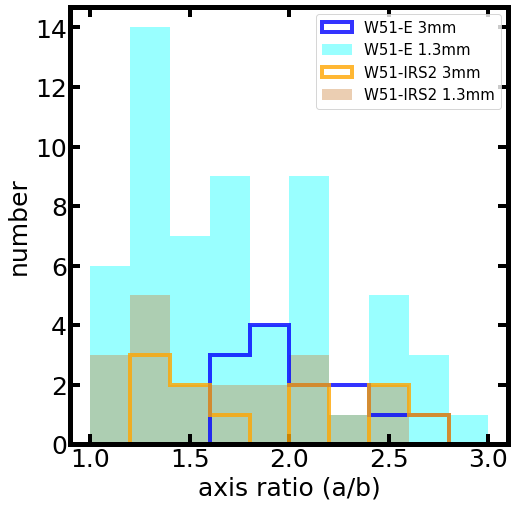

In [3]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.18,0.18,0.76,0.76])
w51e_b3_ratio = w51e_b3_major / w51e_b3_minor
w51e_b6_ratio = w51e_b6_major / w51e_b6_minor
w51n_b3_ratio = w51n_b3_major / w51n_b3_minor
w51n_b6_ratio = w51n_b6_major / w51n_b6_minor

bins = np.linspace(1,3,11)
ax1.hist(w51e_b3_ratio, bins=bins, facecolor='none',edgecolor='b', histtype='step',label='W51-E 3mm',lw=4,alpha=0.8)
ax1.hist(w51e_b6_ratio, bins=bins, color='cyan',label='W51-E 1.3mm',lw=4,alpha=0.4)
ax1.hist(w51n_b3_ratio, bins=bins, facecolor='none',edgecolor='orange', histtype='step',label='W51-IRS2 3mm',lw=4,alpha=0.8)
ax1.hist(w51n_b6_ratio, bins=bins, color='peru',label='W51-IRS2 1.3mm',lw=4,alpha=0.4)

ax1.set_xlabel('axis ratio (a/b)')
ax1.set_ylabel('number')

ax1.legend(fontsize=15)
plt.savefig('axis_ratio_hist.png')

[-- -- 1.8686688656329988 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- 3.089210260409009 1.6112350742218784 -- -- 4.613560950328494 -- --
 -- -- -- -- 2.7530287218041227 -- -- -- -- -- -- -- -- -- -- -- --
 2.104520955251319 -- -- -- 7.741272651506497 -- -- 2.395833372826335
 2.106569465266642 2.2710689600989724 -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- 3.5255434228000557 -- 1.96871849982118 -- 2.5687056633830476 --
 -- -- -- 1.798149864976935 1.9140590427143453 -- 3.1587790502135333 -- --
 1.6430016345307399 -- 3.3258023625909967 -- -- -- -- 3.432157242827555
 1.942005792051218 --]
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[-- -- 32.35342608309968 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- 18.887277251402853 38.3630

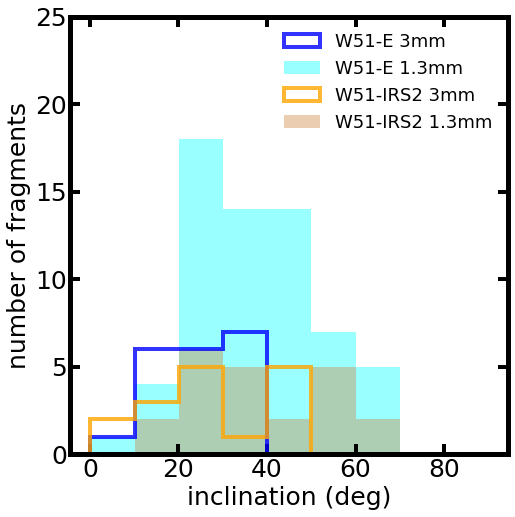

In [4]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.18,0.18,0.76,0.76])
print(w51e_b3_ratio.value)
print(np.arcsin(w51e_b3_ratio.value))
w51e_b3_inc = np.degrees(np.arcsin(1/w51e_b3_ratio.value))
w51e_b6_inc = np.degrees(np.arcsin(1/w51e_b6_ratio.value))
w51n_b3_inc = np.degrees(np.arcsin(1/w51n_b3_ratio.value))
w51n_b6_inc = np.degrees(np.arcsin(1/w51n_b6_ratio.value))
print(w51e_b3_inc)

bins = np.linspace(0.1,90,10)
ax1.hist(w51e_b3_inc, bins=bins, facecolor='none',edgecolor='b', histtype='step',label='W51-E 3mm',lw=4,alpha=0.8)
ax1.hist(w51e_b6_inc, bins=bins, color='cyan',label='W51-E 1.3mm',lw=4,alpha=0.4)
ax1.hist(w51n_b3_inc, bins=bins, facecolor='none',edgecolor='orange', histtype='step',label='W51-IRS2 3mm',lw=4,alpha=0.8)
ax1.hist(w51n_b6_inc, bins=bins, color='peru',label='W51-IRS2 1.3mm',lw=4,alpha=0.4)
print(np.nanmin(w51e_b3_inc), np.nanmax(w51e_b3_inc))
ax1.set_xlabel('inclination (deg)')
ax1.set_ylabel('number of fragments')
ax1.legend(fontsize=18, frameon=False)
ax1.set_ylim(0,25)
plt.savefig('inclination.png')

7.4220788615718 38.36302467758145


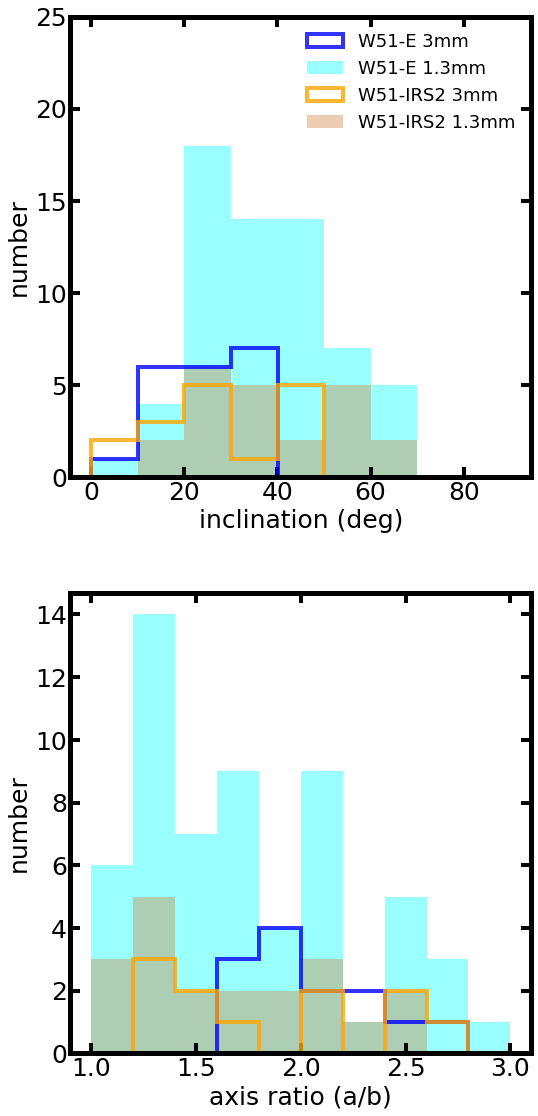

In [5]:
fig = plt.figure(figsize=(8,16))
ax1 = fig.add_axes([0.15,0.58,0.8,0.4])
ax2 = fig.add_axes([0.15,0.08,0.8,0.4])

bins = np.linspace(0.1,90,10)
ax1.hist(w51e_b3_inc, bins=bins, facecolor='none',edgecolor='b', histtype='step',label='W51-E 3mm',lw=4,alpha=0.8)
ax1.hist(w51e_b6_inc, bins=bins, color='cyan',label='W51-E 1.3mm',lw=4,alpha=0.4)
ax1.hist(w51n_b3_inc, bins=bins, facecolor='none',edgecolor='orange', histtype='step',label='W51-IRS2 3mm',lw=4,alpha=0.8)
ax1.hist(w51n_b6_inc, bins=bins, color='peru',label='W51-IRS2 1.3mm',lw=4,alpha=0.4)
print(np.nanmin(w51e_b3_inc), np.nanmax(w51e_b3_inc))
ax1.set_xlabel('inclination (deg)')
ax1.set_ylabel('number')
ax1.legend(fontsize=18, frameon=False)
ax1.set_ylim(0,25)

bins = np.linspace(1,3,11)
ax2.hist(w51e_b3_ratio, bins=bins, facecolor='none',edgecolor='b', histtype='step',label='W51-E 3mm',lw=4,alpha=0.8)
ax2.hist(w51e_b6_ratio, bins=bins, color='cyan',label='W51-E 1.3mm',lw=4,alpha=0.4)
ax2.hist(w51n_b3_ratio, bins=bins, facecolor='none',edgecolor='orange', histtype='step',label='W51-IRS2 3mm',lw=4,alpha=0.8)
ax2.hist(w51n_b6_ratio, bins=bins, color='peru',label='W51-IRS2 1.3mm',lw=4,alpha=0.4)

ax2.set_xlabel('axis ratio (a/b)')
ax2.set_ylabel('number')
plt.savefig('inclination2.png')


NameError: name 'w51e_b3_snr' is not defined

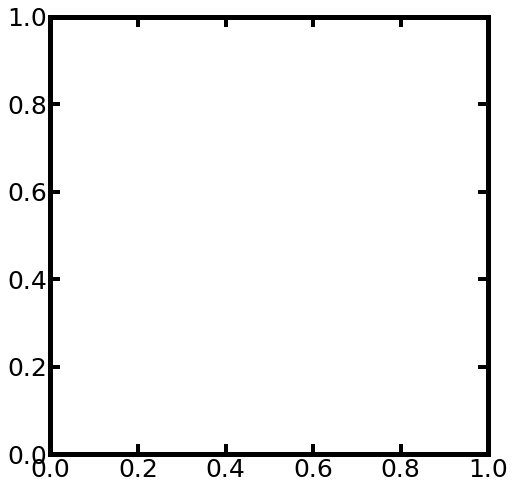

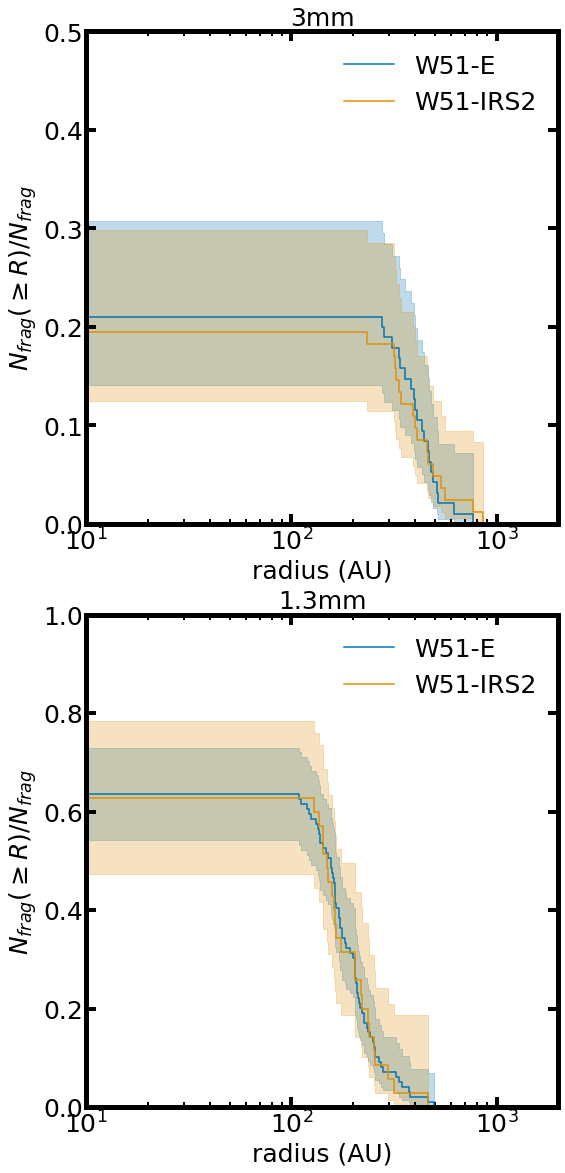

In [6]:
from lifelines import KaplanMeierFitter
import seaborn as sns

fig = plt.figure(figsize=(8,18))
ax1 = fig.add_axes([0.17,0.1,0.82,0.38])
ax2 = fig.add_axes([0.17,0.55,0.82,0.38])

w51e_b6_rad = w51e_b6_max_size_au*2/2.335
w51e_b3_rad = w51e_b3_max_size_au*2/2.335
w51n_b6_rad = w51n_b6_max_size_au*2/2.335
w51n_b3_rad = w51n_b3_max_size_au*2/2.335

w51e_b6_rad[~np.isfinite(w51e_b6_rad)]=-1
w51n_b6_rad[~np.isfinite(w51n_b6_rad)]=-1
w51e_b3_rad[~np.isfinite(w51e_b3_rad)]=-1
w51n_b3_rad[~np.isfinite(w51n_b3_rad)]=-1

                    
w51e_b6_rad_observed = w51e_b6_rad>0
w51n_b6_rad_observed = w51n_b6_rad>0
w51e_b3_rad_observed = w51e_b3_rad>0
w51n_b3_rad_observed = w51n_b3_rad>0



ax1.set_title('1.3mm')
ax2.set_title('3mm')
#w51e_b6_unresolved = [i for i in range(len(w51e_b6_rad)) if w51e_b6_rad[i]!=0 or not np.isfinite(w51e_b6_rad[i])]
#w51e_b6_unresolved = [i for i in range(len(w51e_b3_rad)) if w51e_b3_rad[i]!=0 or not np.isfinite(w51e_b3_rad[i])]
#w51e_b6_unresolved = [i for i in range(len(w51n_b6_rad)) if w51n_b6_rad[i]!=0 or not np.isfinite(w51n_b6_rad[i])]
#w51e_b6_unresolved = [i for i in range(len(w51n_b3_rad)) if w51n_b3_rad[i]!=0 or not np.isfinite(w51n_b3_rad[i])]
"""
w51e_b6_rad[~w51e_b6_unresolved] = w51e_b6_min_size*2/2.355
w51e_b3_rad[~w51e_b3_unresolved] = w51e_b3_min_size*2/2.355
w51n_b6_rad[~w51n_b6_unresolved] = w51n_b6_min_size*2/2.355
w51n_b3_rad[~w51n_b3_unresolved] = w51n_b3_min_size*2/2.355
"""
#w51e_b6_rad[w51e_b6_unresolved] = 0
#w51e_b3_rad[w51e_b3_unresolved] = 0
#w51n_b6_rad[w51n_b6_unresolved] = 0
#w51n_b3_rad[w51n_b3_unresolved] = 0
#w51e_b6_rad.pprint(max_lines=500)
cmap = sns.color_palette("colorblind")

kmf = KaplanMeierFitter(label='W51-E')
kmf.fit_left_censoring(w51e_b6_rad, w51e_b6_rad_observed)
kmf.plot_survival_function(ax=ax1,color=cmap[0])

#kmf = KaplanMeierFitter(label='W51-E B3')
#kmf.fit_left_censoring(w51e_b3_rad, w51e_b3_unresolved)
#kmf.plot_survival_function(ax=ax1,color='cyan')

kmf = KaplanMeierFitter(label='W51-IRS2')
kmf.fit_left_censoring(w51n_b6_rad, w51n_b6_rad_observed)
kmf.plot_survival_function(ax=ax1,color=cmap[1])


cmap = sns.color_palette("colorblind")

kmf = KaplanMeierFitter(label='W51-E')
kmf.fit_left_censoring(w51e_b3_rad, w51e_b3_rad_observed)
kmf.plot_survival_function(ax=ax2,color=cmap[0], ci_legend=False)

#kmf = KaplanMeierFitter(label='W51-E B3')
#kmf.fit_left_censoring(w51e_b3_rad, w51e_b3_unresolved)
#kmf.plot_survival_function(ax=ax1,color='cyan')

kmf = KaplanMeierFitter(label='W51-IRS2')
kmf.fit_left_censoring(w51n_b3_rad, w51n_b3_rad_observed)
kmf.plot_survival_function(ax=ax2,color=cmap[1], ci_legend=False)
"""
##kmf = KaplanMeierFitter(label='W51-IRS2 B3')
#kmf.fit_left_censoring(w51n_b3_rad, w51n_b3_unresolved)
#kmf.plot_survival_function(ax=ax1,color='orange')

#ax1.vlines(w51e_b6_min_size,0,1,color=cmap[0],lw=2,ls='dashed')
#ax1.vlines(w51e_b3_min_size,0,1,color=cmap[2],lw=2,ls='dashed')
#ax1.vlines(w51n_b6_min_size,0,1,color=cmap[1],lw=2,ls='dashed')

#ax1.vlines(w51n_b3_min_size,0,1,color=cmap[3],lw=2,ls='dashed')
tobin20 = fits.open('../tobin20_alma.fit')
tobin20_field = fits.open('../tobin20_almafields.fit')

data = tobin20[1].data
data_field = tobin20_field[1].data
sedclass = data.field(1)
almafieldname1 = data.field(0)
almafieldname2 = data_field.field(0)

dist = data_field.field(3)
size_ang = data.field(4)
size_au_tobin20 = []
for i in range(len(almafieldname1)):
    ind_search = np.where(almafieldname2==almafieldname1[i])[0]
    if len(ind_search)>1:
        ind_search = ind_search[0]
    size = size_ang[i] * dist[ind_search] *2/2.355
    size_au_tobin20.append(size.item())
size_au_tobin20 = np.array(size_au_tobin20)

size_au_tobin20[~np.isfinite(size_au_tobin20)]=-1

size_au_class0_tobin20 = []
size_au_classI_tobin20 = []
size_au_classFlat_tobin20 = []
for i in range(len(size_au_tobin20)):
    if sedclass[i]=='0':
        size_au_class0_tobin20.append(size_au_tobin20[i])
    elif sedclass[i]=='I':
        size_au_classI_tobin20.append(size_au_tobin20[i])
    elif sedclass[i]=='Flat':
        size_au_classFlat_tobin20.append(size_au_tobin20[i])


size_au_class0_tobin20_observed = np.array(size_au_class0_tobin20)>0
size_au_classI_tobin20_observed = np.array(size_au_classI_tobin20)>0
size_au_classFlat_tobin20_observed = np.array(size_au_classFlat_tobin20)>0
kmf = KaplanMeierFitter(label='Tobin+20\nClass 0 (0.87 mm)')
kmf.fit_left_censoring(size_au_class0_tobin20, size_au_class0_tobin20_observed)
kmf.plot_survival_function(ax=ax1,color='seagreen')

kmf = KaplanMeierFitter(label='Tobin+20\nClass I (0.87 mm)')
kmf.fit_left_censoring(size_au_classI_tobin20, size_au_classI_tobin20_observed)
kmf.plot_survival_function(ax=ax1,color='mediumseagreen')

kmf = KaplanMeierFitter(label='Tobin+20\nFlat (0.87 mm)')
kmf.fit_left_censoring(size_au_classFlat_tobin20, size_au_classFlat_tobin20_observed)
kmf.plot_survival_function(ax=ax1,color='springgreen')
"""
ax1.set_xscale('log')
ax1.set_xlim(10,2000)
ax1.set_xlabel('radius (AU)')
#ax1.set_ylabel(r'Fraction with $\geq R$')
ax1.set_ylim(0,1)

ax1.legend(fontsize=25, frameon=False)
ax2.legend(fontsize=25, frameon=False)

ax2.set_xscale('log')
ax2.set_xlim(10,2000)
ax2.set_xlabel('radius (AU)')
ax1.set_ylabel(r'$N_{frag}(\geq R)/N_{frag}$')
ax2.set_ylabel(r'$N_{frag}(\geq R)/N_{frag}$')
ax2.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
ax2.set_ylim(0,0.5)
plt.savefig('size_cumul.png')